# MACHINE LEARNING PROJECT - DATA CLEANING

# The purpose of this analysis is to analyze a kaggle data set that includes 79 variables describing residential homes in Ames, Iowa, with the goal of making recommendations regarding remodeling strategies that will increase home values 

## This file contains code that helps to clean and prepare the data for analysis

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import numpy as np
import seaborn as sns

## Read train data as a pandas dataframe

In [2]:
house_prices_train = pd.read_csv('train.csv')

In [100]:
house_prices_train.shape

(1451, 86)

## Examine Data Frame

In [103]:
pd.options.display.max_columns = None
pd.options.display.max_rows = None

In [7]:
house_prices_train.head(100)

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0     1          60       RL         65.0     8450   Pave   NaN      Reg   
1     2          20       RL         80.0     9600   Pave   NaN      Reg   
2     3          60       RL         68.0    11250   Pave   NaN      IR1   
3     4          70       RL         60.0     9550   Pave   NaN      IR1   
4     5          60       RL         84.0    14260   Pave   NaN      IR1   
5     6          50       RL         85.0    14115   Pave   NaN      IR1   
6     7          20       RL         75.0    10084   Pave   NaN      Reg   
7     8          60       RL          NaN    10382   Pave   NaN      IR1   
8     9          50       RM         51.0     6120   Pave   NaN      Reg   
9    10         190       RL         50.0     7420   Pave   NaN      Reg   
10   11          20       RL         70.0    11200   Pave   NaN      Reg   
11   12          60       RL         85.0    11924   Pave   NaN      IR1   
12   13          20       RL          NaN    12968   Pave   NaN      IR2   
13   14          20       RL         91.0    10652   Pave   NaN      IR1   
14   15          20       RL          NaN    10920   Pave   NaN      IR1   
15   16          45       RM         51.0     6120   Pave   NaN      Reg   
16   17          20       RL          NaN    11241   Pave   NaN      IR1   
17   18          90       RL         72.0    10791   Pave   NaN      Reg   
18   19          20       RL         66.0    13695   Pave   NaN      Reg   
19   20          20       RL         70.0     7560   Pave   NaN      Reg   
20   21          60       RL        101.0    14215   Pave   NaN      IR1   
21   22          45       RM         57.0     7449   Pave  Grvl      Reg   
22   23          20       RL         75.0     9742   Pave   NaN      Reg   
23   24         120       RM         44.0     4224   Pave   NaN      Reg   
24   25          20       RL          NaN     8246   Pave   NaN      IR1   
25   26          20       RL        110.0    14230   Pave   NaN      Reg   
26   27          20       RL         60.0     7200   Pave   NaN      Reg   
27   28          20       RL         98.0    11478   Pave   NaN      Reg   
28   29          20       RL         47.0    16321   Pave   NaN      IR1   
29   30          30       RM         60.0     6324   Pave   NaN      IR1   
30   31          70  C (all)         50.0     8500   Pave  Pave      Reg   
31   32          20       RL          NaN     8544   Pave   NaN      IR1   
32   33          20       RL         85.0    11049   Pave   NaN      Reg   
33   34          20       RL         70.0    10552   Pave   NaN      IR1   
34   35         120       RL         60.0     7313   Pave   NaN      Reg   
35   36          60       RL        108.0    13418   Pave   NaN      Reg   
36   37          20       RL        112.0    10859   Pave   NaN      Reg   
37   38          20       RL         74.0     8532   Pave   NaN      Reg   
38   39          20       RL         68.0     7922   Pave   NaN      Reg   
39   40          90       RL         65.0     6040   Pave   NaN      Reg   
40   41          20       RL         84.0     8658   Pave   NaN      Reg   
41   42          20       RL        115.0    16905   Pave   NaN      Reg   
42   43          85       RL          NaN     9180   Pave   NaN      IR1   
43   44          20       RL          NaN     9200   Pave   NaN      IR1   
44   45          20       RL         70.0     7945   Pave   NaN      Reg   
45   46         120       RL         61.0     7658   Pave   NaN      Reg   
46   47          50       RL         48.0    12822   Pave   NaN      IR1   
47   48          20       FV         84.0    11096   Pave   NaN      Reg   
48   49         190       RM         33.0     4456   Pave   NaN      Reg   
49   50          20       RL         66.0     7742   Pave   NaN      Reg   
50   51          60       RL          NaN    13869   Pave   NaN      IR2   
51   52          50       RM         52.0     6240   

In [8]:
house_prices_train.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [9]:
house_prices_train.dtypes

Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
Street            object
Alley             object
LotShape          object
LandContour       object
Utilities         object
LotConfig         object
LandSlope         object
Neighborhood      object
Condition1        object
Condition2        object
BldgType          object
HouseStyle        object
OverallQual        int64
OverallCond        int64
YearBuilt          int64
YearRemodAdd       int64
RoofStyle         object
RoofMatl          object
Exterior1st       object
Exterior2nd       object
MasVnrType        object
MasVnrArea       float64
ExterQual         object
ExterCond         object
Foundation        object
BsmtQual          object
BsmtCond          object
BsmtExposure      object
BsmtFinType1      object
BsmtFinSF1         int64
BsmtFinType2      object
BsmtFinSF2         int64
BsmtUnfSF          int64
TotalBsmtSF        int64
Heating           object


## Examine Missingness

In [10]:
house_prices_train.isnull().sum()

Id                  0
MSSubClass          0
MSZoning            0
LotFrontage       259
LotArea             0
Street              0
Alley            1369
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType          8
MasVnrArea          8
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           37
BsmtCond           37
BsmtExposure       38
BsmtFinType1       37
BsmtFinSF1          0
BsmtFinType2       38
BsmtFinSF2          0
BsmtUnfSF           0
TotalBsmtSF         0
Heating             0
HeatingQC           0
CentralAir          0
Electrical          1
1stFlrSF            0
2ndFlrSF            0
LowQualFin

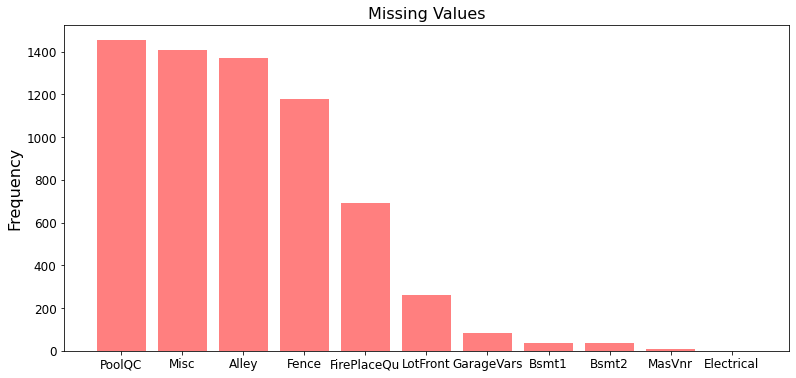

In [469]:
from matplotlib.pyplot import figure
features = ('PoolQC','Misc','Alley','Fence','FirePlaceQu','LotFront','GarageVars','Bsmt1','Bsmt2','MasVnr','Electrical')
y_pos = np.arange(len(features))
missingness = [1453,1406,1369,1179,690,259,81,38,37,8,1]

plt.figure(figsize=(13,6))

plt.bar(y_pos, missingness, align='center', alpha=0.5, color = 'red')
plt.xticks(y_pos, features, fontsize=12)
plt.yticks(fontsize=12)
plt.ylabel('Frequency', fontsize=16)
plt.title('Missing Values', fontsize=16)

plt.show()

#### Most values of Alley, PoolQC, Fence, and MiscFeature are missing so remove these features from analysis

### Examine Mas and Electrical missingness

In [11]:
house_prices_train[house_prices_train.Electrical.isnull()]

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
1379  1380          80       RL         73.0     9735   Pave   NaN      Reg   

     LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
1379         Lvl    AllPub    Inside       Gtl       Timber       Norm   

     Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
1379       Norm     1Fam       SLvl            5            5       2006   

      YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
1379          2007     Gable  CompShg     VinylSd     VinylSd       None   

      MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond  \
1379         0.0        TA        TA      PConc       Gd       TA   

     BsmtExposure BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  \
1379           No          Unf           0          Unf           0   

      BsmtUnfSF  TotalBsmtSF Heating HeatingQC CentralAir Electrical  \
1379        384          384    GasA        Gd          Y        NaN   

      1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  \
1379       754       640             0       1394             0             0   

      FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr KitchenQual  \
1379         2         1             3             1          Gd   

      TotRmsAbvGrd Functional  Fireplaces FireplaceQu GarageType  GarageYrBlt  \
1379             7        Typ           0         NaN    BuiltIn       2007.0   

     GarageFinish  GarageCars  GarageArea GarageQual GarageCond PavedDrive  \
1379          Fin           2         400         TA         TA          Y   

      WoodDeckSF  OpenPorchSF  EnclosedPorch  3SsnPorch  ScreenPorch  \
1379         100            0              0          0            0   

      PoolArea PoolQC Fence MiscFeature  MiscVal  MoSold  YrSold SaleType  \
1379         0    NaN   NaN         NaN        0       5    2008       WD   

     SaleCondition  SalePrice  
1379        Normal     167500

In [12]:
house_prices_train[house_prices_train.MasVnrType.isnull()]

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
234    235          60       RL          NaN     7851   Pave   NaN      Reg   
529    530          20       RL          NaN    32668   Pave   NaN      IR1   
650    651          60       FV         65.0     8125   Pave   NaN      Reg   
936    937          20       RL         67.0    10083   Pave   NaN      Reg   
973    974          20       FV         95.0    11639   Pave   NaN      Reg   
977    978         120       FV         35.0     4274   Pave  Pave      IR1   
1243  1244          20       RL        107.0    13891   Pave   NaN      Reg   
1278  1279          60       RL         75.0     9473   Pave   NaN      Reg   

     LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
234          Lvl    AllPub    Inside       Gtl      Gilbert       Norm   
529          Lvl    AllPub   CulDSac       Gtl      Crawfor       Norm   
650          Lvl    AllPub    Inside       Gtl      Somerst       Norm   
936          Lvl    AllPub    Inside       Gtl      SawyerW       Norm   
973          Lvl    AllPub    Corner       Gtl      Somerst       Norm   
977          Lvl    AllPub    Inside       Gtl      Somerst       Norm   
1243         Lvl    AllPub    Inside       Gtl      NridgHt       Norm   
1278         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   

     Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
234        Norm     1Fam     2Story            6            5       2002   
529        Norm     1Fam     1Story            6            3       1957   
650        Norm     1Fam     2Story            7            6       2007   
936        Norm     1Fam     1Story            7            5       2003   
973        Norm     1Fam     1Story            7            5       2007   
977        Norm   TwnhsE     1Story            7            5       2006   
1243       Norm     1Fam     1Story           10            5       2006   
1278       Norm     1Fam     2Story            8            5       2002   

      YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
234           2002     Gable  CompShg     VinylSd     VinylSd        NaN   
529           1975       Hip  CompShg     Wd Sdng       Stone        NaN   
650           2007     Gable  CompShg     CemntBd     CmentBd        NaN   
936           2003     Gable  CompShg     VinylSd     VinylSd        NaN   
973           2008     Gable  CompShg     CemntBd     CmentBd        NaN   
977           2007     Gable  CompShg     VinylSd     VinylSd        NaN   
1243          2006     Gable  CompShg     VinylSd     VinylSd        NaN   
1278          2002     Gable  CompShg     VinylSd     VinylSd        NaN   

      MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond  \
234          NaN        Gd        TA      PConc       Gd       TA   
529          NaN        Gd        TA      PConc       TA       TA   
650          NaN        Gd        TA      PConc       Gd       TA   
936          NaN        Gd        TA      PConc       Gd       TA   
973          NaN        Gd        TA      PConc       Gd       TA   
977          NaN        Gd        TA      PConc       Gd       TA   
1243         NaN        Ex        TA      PConc       Ex       Gd   
1278         NaN        Gd        TA      PConc       Gd       TA   

     BsmtExposure BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  \
234            No          GLQ         625          Unf           0   
529            No          Rec        1219          Unf           0   
650            No          Unf           0          Unf           0   
936            No          GLQ         833          Unf           0   
973            No          Unf           0          Unf           0   
977            No          GLQ        1106          Unf           0   
1243           Gd          GLQ        1386          Unf           0   
1278           No          GLQ         804          Unf           0  

In [13]:
house_prices_train[house_prices_train.MasVnrArea.isnull()]

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
234    235          60       RL          NaN     7851   Pave   NaN      Reg   
529    530          20       RL          NaN    32668   Pave   NaN      IR1   
650    651          60       FV         65.0     8125   Pave   NaN      Reg   
936    937          20       RL         67.0    10083   Pave   NaN      Reg   
973    974          20       FV         95.0    11639   Pave   NaN      Reg   
977    978         120       FV         35.0     4274   Pave  Pave      IR1   
1243  1244          20       RL        107.0    13891   Pave   NaN      Reg   
1278  1279          60       RL         75.0     9473   Pave   NaN      Reg   

     LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
234          Lvl    AllPub    Inside       Gtl      Gilbert       Norm   
529          Lvl    AllPub   CulDSac       Gtl      Crawfor       Norm   
650          Lvl    AllPub    Inside       Gtl      Somerst       Norm   
936          Lvl    AllPub    Inside       Gtl      SawyerW       Norm   
973          Lvl    AllPub    Corner       Gtl      Somerst       Norm   
977          Lvl    AllPub    Inside       Gtl      Somerst       Norm   
1243         Lvl    AllPub    Inside       Gtl      NridgHt       Norm   
1278         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   

     Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
234        Norm     1Fam     2Story            6            5       2002   
529        Norm     1Fam     1Story            6            3       1957   
650        Norm     1Fam     2Story            7            6       2007   
936        Norm     1Fam     1Story            7            5       2003   
973        Norm     1Fam     1Story            7            5       2007   
977        Norm   TwnhsE     1Story            7            5       2006   
1243       Norm     1Fam     1Story           10            5       2006   
1278       Norm     1Fam     2Story            8            5       2002   

      YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
234           2002     Gable  CompShg     VinylSd     VinylSd        NaN   
529           1975       Hip  CompShg     Wd Sdng       Stone        NaN   
650           2007     Gable  CompShg     CemntBd     CmentBd        NaN   
936           2003     Gable  CompShg     VinylSd     VinylSd        NaN   
973           2008     Gable  CompShg     CemntBd     CmentBd        NaN   
977           2007     Gable  CompShg     VinylSd     VinylSd        NaN   
1243          2006     Gable  CompShg     VinylSd     VinylSd        NaN   
1278          2002     Gable  CompShg     VinylSd     VinylSd        NaN   

      MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond  \
234          NaN        Gd        TA      PConc       Gd       TA   
529          NaN        Gd        TA      PConc       TA       TA   
650          NaN        Gd        TA      PConc       Gd       TA   
936          NaN        Gd        TA      PConc       Gd       TA   
973          NaN        Gd        TA      PConc       Gd       TA   
977          NaN        Gd        TA      PConc       Gd       TA   
1243         NaN        Ex        TA      PConc       Ex       Gd   
1278         NaN        Gd        TA      PConc       Gd       TA   

     BsmtExposure BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  \
234            No          GLQ         625          Unf           0   
529            No          Rec        1219          Unf           0   
650            No          Unf           0          Unf           0   
936            No          GLQ         833          Unf           0   
973            No          Unf           0          Unf           0   
977            No          GLQ        1106          Unf           0   
1243           Gd          GLQ        1386          Unf           0   
1278           No          GLQ         804          Unf           0  

#### These appear to be MCAR (missing completely at random) and may affect remodeling suggestions so the observations will be removed rather than the variables

### Examine LotFrontage missingness

In [14]:
house_prices_train[house_prices_train.LotFrontage.isnull()]

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
7        8          60       RL          NaN    10382   Pave   NaN      IR1   
12      13          20       RL          NaN    12968   Pave   NaN      IR2   
14      15          20       RL          NaN    10920   Pave   NaN      IR1   
16      17          20       RL          NaN    11241   Pave   NaN      IR1   
24      25          20       RL          NaN     8246   Pave   NaN      IR1   
31      32          20       RL          NaN     8544   Pave   NaN      IR1   
42      43          85       RL          NaN     9180   Pave   NaN      IR1   
43      44          20       RL          NaN     9200   Pave   NaN      IR1   
50      51          60       RL          NaN    13869   Pave   NaN      IR2   
64      65          60       RL          NaN     9375   Pave   NaN      Reg   
66      67          20       RL          NaN    19900   Pave   NaN      Reg   
76      77          20       RL          NaN     8475   Pave   NaN      IR1   
84      85          80       RL          NaN     8530   Pave   NaN      IR1   
95      96          60       RL          NaN     9765   Pave   NaN      IR2   
100    101          20       RL          NaN    10603   Pave   NaN      IR1   
104    105          50       RM          NaN     7758   Pave   NaN      Reg   
111    112          80       RL          NaN     7750   Pave   NaN      IR1   
113    114          20       RL          NaN    21000   Pave   NaN      Reg   
116    117          20       RL          NaN    11616   Pave   NaN      Reg   
120    121          80       RL          NaN    21453   Pave   NaN      IR1   
126    127         120       RL          NaN     4928   Pave   NaN      IR1   
131    132          60       RL          NaN    12224   Pave   NaN      IR1   
133    134          20       RL          NaN     6853   Pave   NaN      IR1   
136    137          20       RL          NaN    10355   Pave   NaN      IR1   
147    148          60       RL          NaN     9505   Pave   NaN      IR1   
149    150          50       RM          NaN     6240   Pave   NaN      Reg   
152    153          60       RL          NaN    14803   Pave   NaN      IR1   
153    154          20       RL          NaN    13500   Pave   NaN      Reg   
160    161          20       RL          NaN    11120   Pave   NaN      IR1   
166    167          20       RL          NaN    10708   Pave   NaN      IR1   
169    170          20       RL          NaN    16669   Pave   NaN      IR1   
170    171          50       RM          NaN    12358   Pave   NaN      IR1   
177    178          50       RL          NaN    13650   Pave   NaN      Reg   
180    181         160       FV          NaN     2117   Pave   NaN      Reg   
186    187          80       RL          NaN     9947   Pave   NaN      IR1   
191    192          60       RL          NaN     7472   Pave   NaN      IR1   
203    204         120       RM          NaN     4438   Pave   NaN      Reg   
207    208          20       RL          NaN    12493   Pave   NaN      IR1   
208    209          60       RL          NaN    14364   Pave   NaN      IR1   
214    215          60       RL          NaN    10900   Pave   NaN      IR1   
218    219          50       RL          NaN    15660   Pave   NaN      IR1   
221    222          60       RL          NaN     8068   Pave   NaN      IR1   
234    235          60       RL          NaN     7851   Pave   NaN      Reg   
237    238          60       RL          NaN     9453   Pave   NaN      IR1   
244    245          60       RL          NaN     8880   Pave   NaN      IR1   
249    250          50       RL          NaN   159000   Pave   NaN      IR2   
269    270          20       RL          NaN     7917   Pave   NaN      IR1   
287    288          20       RL          NaN     8125   Pave   NaN      IR1   
288    289          20       RL          NaN     9819   Pave   NaN      IR1   
293    294          60       RL          NaN    16659   Pa

#### Missingness in LotFrontage appears to be MCAR (missing completely at random)

### Examine whether LotFrontage is correlated with sales price

In [15]:
from scipy.stats import pearsonr
LotFrontage_data = house_prices_train[['LotFrontage','SalePrice']].dropna(axis=0)
LotFrontage_data.head()

LotFrontage  SalePrice
0         65.0     208500
1         80.0     181500
2         68.0     223500
3         60.0     140000
4         84.0     250000

In [16]:
pearsonr(LotFrontage_data.LotFrontage, LotFrontage_data.SalePrice)

(0.35179909657067787, 2.6024418123943414e-36)

#### LotFrontage is significantly correlated with SalePrice. However, approximately 18% of the observations in this data set are missing LotFrontage values, so we would lose a lot of information by deleting these rows. The purpose of the analysis is to make recommendations regarding remodeling. It is unlikely that home owners can make direct changes to the linear feet of street connected to the property, so this variable is less likely to be helpful for home owners who would like to increase the value of their property. It is riskier to remove observations with missing values than it is to remove this variable from the data set.

### Examine missingness for basement, garage, and fireplace variables

In [17]:
house_prices_train[house_prices_train.BsmtExposure.isnull()]

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
17      18          90       RL         72.0    10791   Pave   NaN      Reg   
39      40          90       RL         65.0     6040   Pave   NaN      Reg   
90      91          20       RL         60.0     7200   Pave   NaN      Reg   
102    103          90       RL         64.0     7018   Pave   NaN      Reg   
156    157          20       RL         60.0     7200   Pave   NaN      Reg   
182    183          20       RL         60.0     9060   Pave   NaN      Reg   
259    260          20       RM         70.0    12702   Pave   NaN      Reg   
342    343          90       RL          NaN     8544   Pave   NaN      Reg   
362    363          85       RL         64.0     7301   Pave   NaN      Reg   
371    372          50       RL         80.0    17120   Pave   NaN      Reg   
392    393          20       RL          NaN     8339   Pave   NaN      IR1   
520    521         190       RL         60.0    10800   Pave  Grvl      Reg   
532    533          20       RL         60.0     7200   Pave   NaN      Reg   
533    534          20       RL         50.0     5000   Pave   NaN      Reg   
553    554          20       RL         67.0     8777   Pave   NaN      Reg   
646    647          20       RL         60.0     7200   Pave   NaN      Reg   
705    706         190       RM         70.0     5600   Pave   NaN      Reg   
736    737          90       RL         60.0     8544   Pave   NaN      Reg   
749    750          50       RL         50.0     8405   Pave   NaN      Reg   
778    779          90       RH         60.0     8400   Pave   NaN      Reg   
868    869          60       RL          NaN    14762   Pave   NaN      IR2   
894    895          90       RL         64.0     7018   Pave   NaN      Reg   
897    898          90       RL         64.0     7018   Pave   NaN      Reg   
948    949          60       RL         65.0    14006   Pave   NaN      IR1   
984    985          90       RL         75.0    10125   Pave   NaN      Reg   
1000  1001          20       RL         74.0    10206   Pave   NaN      Reg   
1011  1012          90       RL         75.0     9825   Pave   NaN      Reg   
1035  1036          20       RL          NaN    11500   Pave   NaN      IR1   
1045  1046          20       RL          NaN    13680   Pave   NaN      IR1   
1048  1049          20       RL        100.0    21750   Pave   NaN      Reg   
1049  1050          20       RL         60.0    11100   Pave   NaN      Reg   
1090  1091          90       RL         60.0     8544   Pave   NaN      Reg   
1179  1180          20       RL         77.0     8335   Pave   NaN      Reg   
1216  1217          90       RM         68.0     8930   Pave   NaN      Reg   
1218  1219          50       RM         52.0     6240   Pave   NaN      Reg   
1232  1233          90       RL         70.0     9842   Pave   NaN      Reg   
1321  1322          20       RL          NaN     6627   Pave   NaN      IR1   
1412  1413          90       RL         60.0     7200   Pave   NaN      Reg   

     LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
17           Lvl    AllPub    Inside       Gtl       Sawyer       Norm   
39           Lvl    AllPub    Inside       Gtl      Edwards       Norm   
90           Lvl    AllPub    Inside       Gtl        NAmes       Norm   
102          Bnk    AllPub    Inside       Gtl      SawyerW       Norm   
156          Lvl    AllPub    Inside       Gtl        NAmes       Norm   
182          Lvl    AllPub    Inside       Gtl      Edwards     Artery   
259          Lvl    AllPub    Inside       Gtl      OldTown       Norm   
342          Lvl    AllPub    Inside       Gtl        NAmes       Norm   
362          Lvl    AllPub    Corner       Gtl      Edwards       Norm   
371          Lvl    AllPub    Inside       Gtl      ClearCr      Feedr   
392          Lvl    AllPub    Inside       Gtl        NAmes       Norm   
520          Lvl    AllPub    Inside  

In [18]:
house_prices_train[house_prices_train.GarageType.isnull()]

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
39      40          90       RL         65.0     6040   Pave   NaN      Reg   
48      49         190       RM         33.0     4456   Pave   NaN      Reg   
78      79          90       RL         72.0    10778   Pave   NaN      Reg   
88      89          50  C (all)        105.0     8470   Pave   NaN      IR1   
89      90          20       RL         60.0     8070   Pave   NaN      Reg   
99     100          20       RL         77.0     9320   Pave   NaN      IR1   
108    109          50       RM         85.0     8500   Pave   NaN      Reg   
125    126         190       RM         60.0     6780   Pave   NaN      Reg   
127    128          45       RM         55.0     4388   Pave   NaN      IR1   
140    141          20       RL         70.0    10500   Pave   NaN      Reg   
148    149          20       RL         63.0     7500   Pave   NaN      Reg   
155    156          50       RL         60.0     9600   Pave   NaN      Reg   
163    164          45       RL         55.0     5500   Pave   NaN      Reg   
165    166         190       RL         62.0    10106   Pave   NaN      Reg   
198    199          75       RM         92.0     5520   Pave   NaN      Reg   
210    211          30       RL         67.0     5604   Pave   NaN      Reg   
241    242          30       RM         40.0     3880   Pave   NaN      Reg   
250    251          30       RL         55.0     5350   Pave   NaN      IR1   
287    288          20       RL          NaN     8125   Pave   NaN      IR1   
291    292         190       RL         55.0     5687   Pave  Grvl      Reg   
307    308          50       RM          NaN     7920   Pave  Grvl      IR1   
375    376          30       RL          NaN    10020   Pave   NaN      IR1   
386    387          50       RL         58.0     8410   Pave   NaN      Reg   
393    394          30       RL          NaN     7446   Pave   NaN      Reg   
431    432          50       RM         60.0     5586   Pave   NaN      IR1   
434    435         180       RM         21.0     1890   Pave   NaN      Reg   
441    442          90       RL         92.0    12108   Pave   NaN      Reg   
464    465          20       RL         60.0     8430   Pave   NaN      Reg   
495    496          30  C (all)         60.0     7879   Pave   NaN      Reg   
520    521         190       RL         60.0    10800   Pave  Grvl      Reg   
528    529          30       RL         58.0     9098   Pave   NaN      IR1   
533    534          20       RL         50.0     5000   Pave   NaN      Reg   
535    536         190       RL         70.0     7000   Pave   NaN      Reg   
562    563          30       RL         63.0    13907   Pave   NaN      Reg   
582    583          90       RL         81.0    11841   Grvl   NaN      Reg   
613    614          20       RL         70.0     8402   Pave   NaN      Reg   
614    615         180       RM         21.0     1491   Pave   NaN      Reg   
620    621          30       RL         45.0     8248   Pave  Grvl      Reg   
635    636         190       RH         60.0    10896   Pave  Pave      Reg   
636    637          30       RM         51.0     6120   Pave   NaN      Reg   
638    639          30       RL         67.0     8777   Pave   NaN      Reg   
649    650         180       RM         21.0     1936   Pave   NaN      Reg   
705    706         190       RM         70.0     5600   Pave   NaN      Reg   
710    711          30       RL         56.0     4130   Pave   NaN      IR1   
738    739          90       RL         60.0    10800   Pave   NaN      Reg   
750    751          50       RM         55.0     8800   Pave  Grvl      Reg   
784    785          75       RM         35.0     6300   Pave  Grvl      Reg   
826    827          45       RM         50.0     6130   Pave   NaN      Reg   
843    844          90       RL         80.0     8000   Pave   NaN      Reg   
921    922          90       RL         67.0     8777   Pa

In [19]:
house_prices_train[house_prices_train.FireplaceQu.isnull()]

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0        1          60       RL         65.0     8450   Pave   NaN      Reg   
5        6          50       RL         85.0    14115   Pave   NaN      IR1   
10      11          20       RL         70.0    11200   Pave   NaN      Reg   
12      13          20       RL          NaN    12968   Pave   NaN      IR2   
15      16          45       RM         51.0     6120   Pave   NaN      Reg   
17      18          90       RL         72.0    10791   Pave   NaN      Reg   
18      19          20       RL         66.0    13695   Pave   NaN      Reg   
19      20          20       RL         70.0     7560   Pave   NaN      Reg   
26      27          20       RL         60.0     7200   Pave   NaN      Reg   
29      30          30       RM         60.0     6324   Pave   NaN      IR1   
30      31          70  C (all)         50.0     8500   Pave  Pave      Reg   
31      32          20       RL          NaN     8544   Pave   NaN      IR1   
32      33          20       RL         85.0    11049   Pave   NaN      Reg   
36      37          20       RL        112.0    10859   Pave   NaN      Reg   
38      39          20       RL         68.0     7922   Pave   NaN      Reg   
39      40          90       RL         65.0     6040   Pave   NaN      Reg   
42      43          85       RL          NaN     9180   Pave   NaN      IR1   
43      44          20       RL          NaN     9200   Pave   NaN      IR1   
44      45          20       RL         70.0     7945   Pave   NaN      Reg   
47      48          20       FV         84.0    11096   Pave   NaN      Reg   
48      49         190       RM         33.0     4456   Pave   NaN      Reg   
49      50          20       RL         66.0     7742   Pave   NaN      Reg   
50      51          60       RL          NaN    13869   Pave   NaN      IR2   
52      53          90       RM        110.0     8472   Grvl   NaN      IR2   
56      57         160       FV         24.0     2645   Pave  Pave      Reg   
57      58          60       RL         89.0    11645   Pave   NaN      IR1   
59      60          20       RL         60.0     7200   Pave   NaN      Reg   
60      61          20       RL         63.0    13072   Pave   NaN      Reg   
61      62          75       RM         60.0     7200   Pave   NaN      Reg   
63      64          70       RM         50.0    10300   Pave   NaN      IR1   
64      65          60       RL          NaN     9375   Pave   NaN      Reg   
67      68          20       RL         72.0    10665   Pave   NaN      IR1   
68      69          30       RM         47.0     4608   Pave   NaN      Reg   
71      72          20       RL         69.0     7599   Pave   NaN      Reg   
73      74          20       RL         85.0    10200   Pave   NaN      Reg   
74      75          50       RM         60.0     5790   Pave   NaN      Reg   
75      76         180       RM         21.0     1596   Pave   NaN      Reg   
76      77          20       RL          NaN     8475   Pave   NaN      IR1   
77      78          50       RM         50.0     8635   Pave   NaN      Reg   
78      79          90       RL         72.0    10778   Pave   NaN      Reg   
79      80          50       RM         60.0    10440   Pave  Grvl      Reg   
81      82         120       RM         32.0     4500   Pave   NaN      Reg   
83      84          20       RL         80.0     8892   Pave   NaN      IR1   
87      88         160       FV         40.0     3951   Pave  Pave      Reg   
88      89          50  C (all)        105.0     8470   Pave   NaN      IR1   
89      90          20       RL         60.0     8070   Pave   NaN      Reg   
90      91          20       RL         60.0     7200   Pave   NaN      Reg   
91      92          20       RL         85.0     8500   Pave   NaN      Reg   
92      93          30       RL         80.0    13360   Pave  Grvl      IR1   
94      95          60       RL         69.0     9337   Pa

#### Missingness for basement, garage, and fireplace variables are MAR (missing at random). These values are missing because there is no basement, garage, or fireplace in these cases. Recode missing values as no basement (NB), no garage (NG), and no fireplace (NF) and keep these variables

## Additional observations regarding variables and data cleaning

### Examine continuous variables

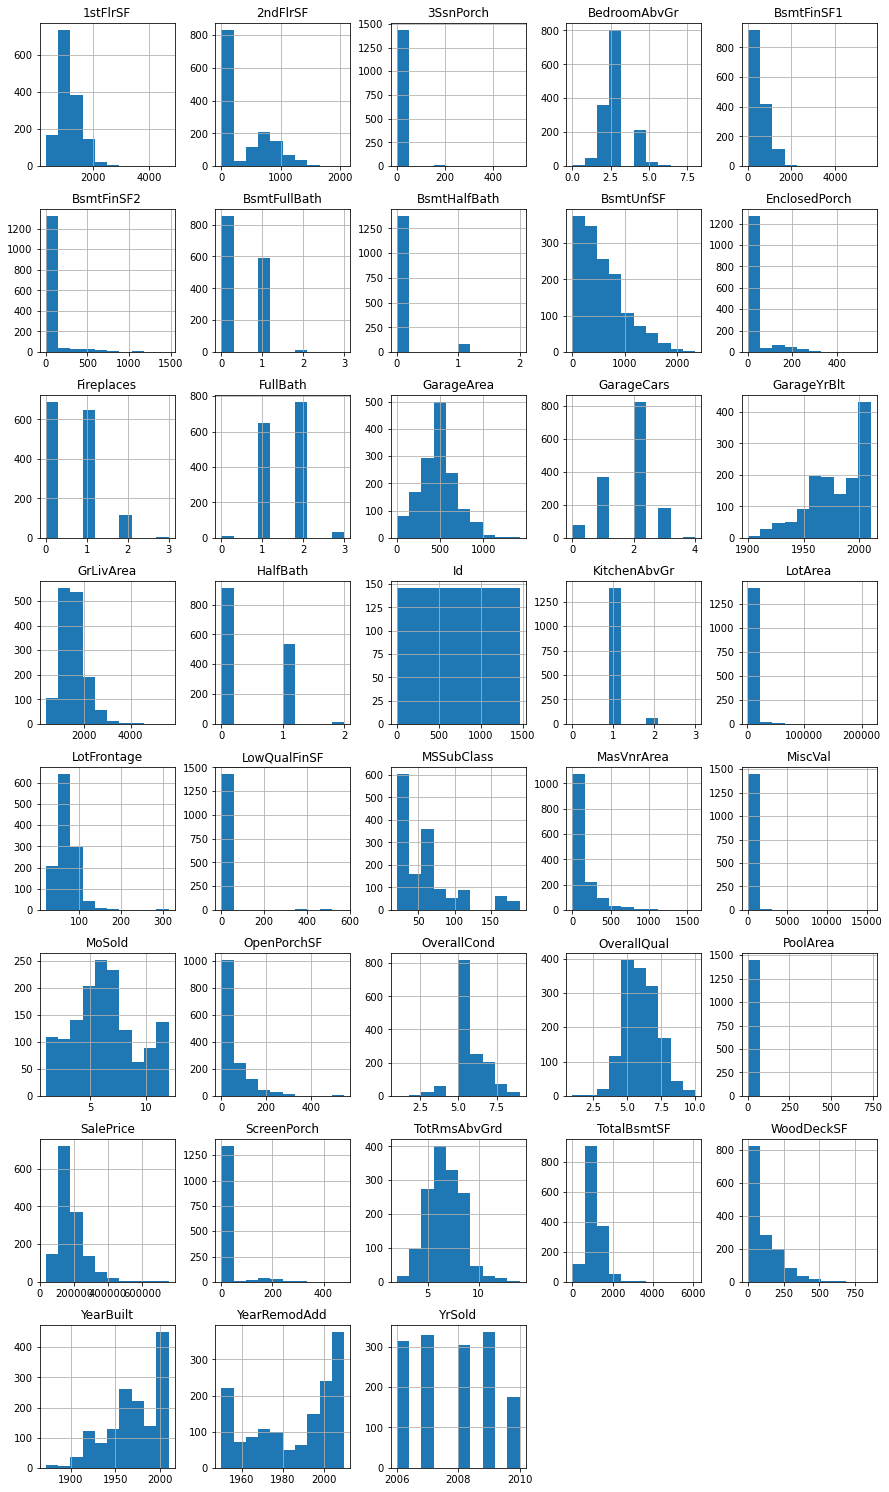

In [20]:
house_prices_train.hist(figsize=(15,30), layout=(9,5))
plt.show()

In [21]:
house_prices_train['3SsnPorch'].value_counts()

0      1436
168       3
216       2
144       2
180       2
245       1
238       1
290       1
196       1
182       1
407       1
304       1
162       1
153       1
320       1
140       1
130       1
96        1
23        1
508       1
Name: 3SsnPorch, dtype: int64

In [22]:
house_prices_train['LowQualFinSF'].value_counts()

0      1434
80        3
360       2
528       1
53        1
120       1
144       1
156       1
205       1
232       1
234       1
371       1
572       1
390       1
392       1
397       1
420       1
473       1
479       1
481       1
513       1
514       1
515       1
384       1
Name: LowQualFinSF, dtype: int64

#### Summary: Need to create new variable TotalPorchSF

### Investigate potential outliers

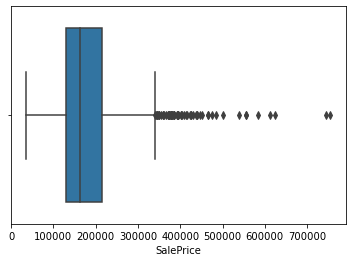

In [23]:
sns.boxplot(x=house_prices_train['SalePrice'])

### There are a lot of outliers. Too many to remove.

### Examine Value Counts for categorical variables

In [33]:
house_prices_train.MSSubClass.value_counts()

20     536
60     299
50     144
120     87
30      69
160     63
70      60
80      58
90      52
190     30
85      20
75      16
45      12
180     10
40       4
Name: MSSubClass, dtype: int64

In [34]:
house_prices_train.MSZoning.value_counts()

RL         1151
RM          218
FV           65
RH           16
C (all)      10
Name: MSZoning, dtype: int64

In [35]:
house_prices_train.LandContour.value_counts()

Lvl    1311
Bnk      63
HLS      50
Low      36
Name: LandContour, dtype: int64

In [36]:
house_prices_train.LotShape.value_counts()

Reg    925
IR1    484
IR2     41
IR3     10
Name: LotShape, dtype: int64

In [37]:
house_prices_train.Utilities.value_counts()

AllPub    1459
NoSeWa       1
Name: Utilities, dtype: int64

In [38]:
house_prices_train.LotConfig.value_counts()

Inside     1052
Corner      263
CulDSac      94
FR2          47
FR3           4
Name: LotConfig, dtype: int64

In [39]:
house_prices_train.LandSlope.value_counts()

Gtl    1382
Mod      65
Sev      13
Name: LandSlope, dtype: int64

In [40]:
house_prices_train.Neighborhood.value_counts()

NAmes      225
CollgCr    150
OldTown    113
Edwards    100
Somerst     86
Gilbert     79
NridgHt     77
Sawyer      74
NWAmes      73
SawyerW     59
BrkSide     58
Crawfor     51
Mitchel     49
NoRidge     41
Timber      38
IDOTRR      37
ClearCr     28
StoneBr     25
SWISU       25
MeadowV     17
Blmngtn     17
BrDale      16
Veenker     11
NPkVill      9
Blueste      2
Name: Neighborhood, dtype: int64

In [41]:
house_prices_train.Condition1.value_counts()

Norm      1260
Feedr       81
Artery      48
RRAn        26
PosN        19
RRAe        11
PosA         8
RRNn         5
RRNe         2
Name: Condition1, dtype: int64

In [42]:
house_prices_train.Condition2.value_counts()

Norm      1445
Feedr        6
PosN         2
RRNn         2
Artery       2
PosA         1
RRAe         1
RRAn         1
Name: Condition2, dtype: int64

In [43]:
house_prices_train.BldgType.value_counts()

1Fam      1220
TwnhsE     114
Duplex      52
Twnhs       43
2fmCon      31
Name: BldgType, dtype: int64

In [44]:
house_prices_train.HouseStyle.value_counts()

1Story    726
2Story    445
1.5Fin    154
SLvl       65
SFoyer     37
1.5Unf     14
2.5Unf     11
2.5Fin      8
Name: HouseStyle, dtype: int64

In [45]:
house_prices_train.RoofStyle.value_counts()

Gable      1141
Hip         286
Flat         13
Gambrel      11
Mansard       7
Shed          2
Name: RoofStyle, dtype: int64

In [46]:
house_prices_train.RoofMatl.value_counts()

CompShg    1434
Tar&Grv      11
WdShngl       6
WdShake       5
Membran       1
Roll          1
ClyTile       1
Metal         1
Name: RoofMatl, dtype: int64

In [47]:
house_prices_train.Exterior1st.value_counts()

VinylSd    515
HdBoard    222
MetalSd    220
Wd Sdng    206
Plywood    108
CemntBd     61
BrkFace     50
WdShing     26
Stucco      25
AsbShng     20
BrkComm      2
Stone        2
ImStucc      1
CBlock       1
AsphShn      1
Name: Exterior1st, dtype: int64

In [48]:
house_prices_train.Exterior2nd.value_counts()

VinylSd    504
MetalSd    214
HdBoard    207
Wd Sdng    197
Plywood    142
CmentBd     60
Wd Shng     38
Stucco      26
BrkFace     25
AsbShng     20
ImStucc     10
Brk Cmn      7
Stone        5
AsphShn      3
CBlock       1
Other        1
Name: Exterior2nd, dtype: int64

In [49]:
house_prices_train.MasVnrType.value_counts()

None       864
BrkFace    445
Stone      128
BrkCmn      15
Name: MasVnrType, dtype: int64

In [50]:
house_prices_train.ExterQual.value_counts()

TA    906
Gd    488
Ex     52
Fa     14
Name: ExterQual, dtype: int64

In [51]:
house_prices_train.ExterCond.value_counts()

TA    1282
Gd     146
Fa      28
Ex       3
Po       1
Name: ExterCond, dtype: int64

In [52]:
house_prices_train.Foundation.value_counts()

PConc     647
CBlock    634
BrkTil    146
Slab       24
Stone       6
Wood        3
Name: Foundation, dtype: int64

In [53]:
house_prices_train.Heating.value_counts()

GasA     1428
GasW       18
Grav        7
Wall        4
OthW        2
Floor       1
Name: Heating, dtype: int64

In [54]:
house_prices_train.CentralAir.value_counts()

Y    1365
N      95
Name: CentralAir, dtype: int64

In [55]:
house_prices_train.Electrical.value_counts()

SBrkr    1334
FuseA      94
FuseF      27
FuseP       3
Mix         1
Name: Electrical, dtype: int64

In [56]:
house_prices_train.Functional.value_counts()

Typ     1360
Min2      34
Min1      31
Mod       15
Maj1      14
Maj2       5
Sev        1
Name: Functional, dtype: int64

In [57]:
house_prices_train.GarageType.value_counts()

Attchd     870
Detchd     387
BuiltIn     88
Basment     19
CarPort      9
2Types       6
Name: GarageType, dtype: int64

In [58]:
house_prices_train.SaleType.value_counts()

WD       1267
New       122
COD        43
ConLD       9
ConLw       5
ConLI       5
CWD         4
Oth         3
Con         2
Name: SaleType, dtype: int64

In [59]:
house_prices_train.SaleCondition.value_counts()

Normal     1198
Partial     125
Abnorml     101
Family       20
Alloca       12
AdjLand       4
Name: SaleCondition, dtype: int64

In [60]:
house_prices_train.Neighborhood.value_counts()

NAmes      225
CollgCr    150
OldTown    113
Edwards    100
Somerst     86
Gilbert     79
NridgHt     77
Sawyer      74
NWAmes      73
SawyerW     59
BrkSide     58
Crawfor     51
Mitchel     49
NoRidge     41
Timber      38
IDOTRR      37
ClearCr     28
StoneBr     25
SWISU       25
MeadowV     17
Blmngtn     17
BrDale      16
Veenker     11
NPkVill      9
Blueste      2
Name: Neighborhood, dtype: int64

#### After examining value counts for several categorical variables, it is determined that Utilities should be removed from analysis. All but one of the Utilities observations are "AllPub" - there is not enough variability in that feature to be predictive

## Feature Engineering

#### Examination of MSSubClass reveals that it is redundant with information provided in BldgType, HouseStyle, and YearBuilt, except for information about PUD. Create new variable that codes for PUD vs. non-PUD and remove MSSubClass from data set

#### Create new binary variable to code for remodel. If YearBuilt and YearRemodAdd are different, code 1 (there was a remodel), else code 0 (there was no remodel)

## Examine average sales price per neighborhood to collapse across levels neighborhood

In [61]:
house_prices_train.groupby('Neighborhood').mean()['SalePrice'].sort_values(ascending=False)

Neighborhood
NoRidge    335295.317073
NridgHt    316270.623377
StoneBr    310499.000000
Timber     242247.447368
Veenker    238772.727273
Somerst    225379.837209
ClearCr    212565.428571
Crawfor    210624.725490
CollgCr    197965.773333
Blmngtn    194870.882353
Gilbert    192854.506329
NWAmes     189050.068493
SawyerW    186555.796610
Mitchel    156270.122449
NAmes      145847.080000
NPkVill    142694.444444
SWISU      142591.360000
Blueste    137500.000000
Sawyer     136793.135135
OldTown    128225.300885
Edwards    128219.700000
BrkSide    124834.051724
BrDale     104493.750000
IDOTRR     100123.783784
MeadowV     98576.470588
Name: SalePrice, dtype: float64

## Based on exploration of data set, the following changes are needed:
### - Recode missing values in basement as NB, in garage as NG, and in fireplace as NF
#### Note that one value in BsmtExposure and one value in BsmtFinType2 are actually MCAR, so code these as 'missing' first
### - remove observations with missing values in electrical, MasVnrType, MasVnrArea 
#### (n = 5 after making prior changes)
### - Create new binary value that codes for whether there has been a remodel
### - Create new variable based on MSSubClass that codes for PUD (P) vs. Non-PUD (NP)
### - Create new variable TotalPorchSF
### - Code neighborhoods for level of affluence 

In [104]:
house_prices_train.loc[948, 'BsmtExposure'] = 'missing'

In [105]:
house_prices_train.loc[332, 'BsmtFinType2'] = 'missing'

In [106]:
house_prices_train = house_prices_train.copy()

In [107]:
house_prices_train["BsmtQual"] = house_prices_train["BsmtQual"].fillna("NB")
house_prices_train["BsmtCond"] = house_prices_train["BsmtCond"].replace(np.nan, "NB")
house_prices_train["BsmtExposure"] = house_prices_train["BsmtExposure"].fillna("NB")
house_prices_train["BsmtFinType1"] = house_prices_train["BsmtFinType1"].fillna("NB")
house_prices_train["BsmtFinType2"] = house_prices_train["BsmtFinType2"].fillna("NB")

In [108]:
house_prices_train["GarageType"] = house_prices_train["GarageType"].fillna("NG")
house_prices_train["GarageYrBlt"] = house_prices_train["GarageYrBlt"].fillna("NG")
house_prices_train["GarageFinish"] = house_prices_train["GarageFinish"].fillna("NG")
house_prices_train["GarageQual"] = house_prices_train["GarageQual"].fillna("NG")
house_prices_train["GarageCond"] = house_prices_train["GarageCond"].fillna("NG")

In [109]:
house_prices_train["FireplaceQu"] = house_prices_train["FireplaceQu"].fillna("NF")

In [110]:
house_prices_train = house_prices_train.dropna(subset=['Electrical', 'MasVnrType','MasVnrArea'])

In [111]:
house_prices_train = house_prices_train.copy()

In [112]:
house_prices_train['remodel'] = np.where(house_prices_train['YearBuilt'] - house_prices_train['YearRemodAdd'] == 0, 0, 1)


In [113]:
house_prices_train['pud'] = [1 if x == 120 or x == 160 or x == 180 else 0 for x in house_prices_train['MSSubClass']] 


In [114]:
house_prices_train.shape

(1451, 86)

In [115]:
house_prices_train['TotalPorchSF'] = house_prices_train.apply(lambda row: row.OpenPorchSF + row.EnclosedPorch + row['3SsnPorch'] + row.ScreenPorch, axis=1)


In [116]:
house_prices_train.groupby('Neighborhood').mean()['SalePrice'].sort_values(ascending=False)

Neighborhood
NoRidge    335295.317073
NridgHt    314313.657895
StoneBr    310499.000000
Timber     244267.648649
Veenker    238772.727273
Somerst    226443.566265
ClearCr    212565.428571
Crawfor    210824.740000
CollgCr    197703.798658
Blmngtn    194870.882353
Gilbert    192551.358974
NWAmes     189050.068493
SawyerW    186584.344828
Mitchel    156270.122449
NAmes      145847.080000
NPkVill    142694.444444
SWISU      142591.360000
Blueste    137500.000000
Sawyer     136793.135135
OldTown    128225.300885
Edwards    128219.700000
BrkSide    124834.051724
BrDale     104493.750000
IDOTRR     100123.783784
MeadowV     98576.470588
Name: SalePrice, dtype: float64

#### Codes: 3 for > 300k, 2 for 186-245k, 1 for 98-157k; NOTE: Remodel Recommendations may vary by affluence of neighborhood

In [440]:
house_prices_train['MeanNeighborhood'] = house_prices_train['SalePrice'].groupby(house_prices_train['Neighborhood']).transform('mean')


In [118]:
house_prices_train['NeighborhoodCode'] = [3 if x > 300000 else 1 if x < 157000 else 2 for x in house_prices_train['MeanNeighborhood']] 


In [78]:
house_prices_train.head(100)

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0     1          60       RL         65.0     8450   Pave   NaN      Reg   
1     2          20       RL         80.0     9600   Pave   NaN      Reg   
2     3          60       RL         68.0    11250   Pave   NaN      IR1   
3     4          70       RL         60.0     9550   Pave   NaN      IR1   
4     5          60       RL         84.0    14260   Pave   NaN      IR1   
5     6          50       RL         85.0    14115   Pave   NaN      IR1   
6     7          20       RL         75.0    10084   Pave   NaN      Reg   
7     8          60       RL          NaN    10382   Pave   NaN      IR1   
8     9          50       RM         51.0     6120   Pave   NaN      Reg   
9    10         190       RL         50.0     7420   Pave   NaN      Reg   
10   11          20       RL         70.0    11200   Pave   NaN      Reg   
11   12          60       RL         85.0    11924   Pave   NaN      IR1   
12   13          20       RL          NaN    12968   Pave   NaN      IR2   
13   14          20       RL         91.0    10652   Pave   NaN      IR1   
14   15          20       RL          NaN    10920   Pave   NaN      IR1   
15   16          45       RM         51.0     6120   Pave   NaN      Reg   
16   17          20       RL          NaN    11241   Pave   NaN      IR1   
17   18          90       RL         72.0    10791   Pave   NaN      Reg   
18   19          20       RL         66.0    13695   Pave   NaN      Reg   
19   20          20       RL         70.0     7560   Pave   NaN      Reg   
20   21          60       RL        101.0    14215   Pave   NaN      IR1   
21   22          45       RM         57.0     7449   Pave  Grvl      Reg   
22   23          20       RL         75.0     9742   Pave   NaN      Reg   
23   24         120       RM         44.0     4224   Pave   NaN      Reg   
24   25          20       RL          NaN     8246   Pave   NaN      IR1   
25   26          20       RL        110.0    14230   Pave   NaN      Reg   
26   27          20       RL         60.0     7200   Pave   NaN      Reg   
27   28          20       RL         98.0    11478   Pave   NaN      Reg   
28   29          20       RL         47.0    16321   Pave   NaN      IR1   
29   30          30       RM         60.0     6324   Pave   NaN      IR1   
30   31          70  C (all)         50.0     8500   Pave  Pave      Reg   
31   32          20       RL          NaN     8544   Pave   NaN      IR1   
32   33          20       RL         85.0    11049   Pave   NaN      Reg   
33   34          20       RL         70.0    10552   Pave   NaN      IR1   
34   35         120       RL         60.0     7313   Pave   NaN      Reg   
35   36          60       RL        108.0    13418   Pave   NaN      Reg   
36   37          20       RL        112.0    10859   Pave   NaN      Reg   
37   38          20       RL         74.0     8532   Pave   NaN      Reg   
38   39          20       RL         68.0     7922   Pave   NaN      Reg   
39   40          90       RL         65.0     6040   Pave   NaN      Reg   
40   41          20       RL         84.0     8658   Pave   NaN      Reg   
41   42          20       RL        115.0    16905   Pave   NaN      Reg   
42   43          85       RL          NaN     9180   Pave   NaN      IR1   
43   44          20       RL          NaN     9200   Pave   NaN      IR1   
44   45          20       RL         70.0     7945   Pave   NaN      Reg   
45   46         120       RL         61.0     7658   Pave   NaN      Reg   
46   47          50       RL         48.0    12822   Pave   NaN      IR1   
47   48          20       FV         84.0    11096   Pave   NaN      Reg   
48   49         190       RM         33.0     4456   Pave   NaN      Reg   
49   50          20       RL         66.0     7742   Pave   NaN      Reg   
50   51          60       RL          NaN    13869   Pave   NaN      IR2   
51   52          50       RM         52.0     6240   

In [455]:
house_prices_train.groupby('NeighborhoodCode').agg(['min', 'max','mean','std'])['SalePrice']

min     max           mean            std
NeighborhoodCode                                              
1                  34900  475000  134239.502069   40041.412989
2                  76000  424870  204391.287671   54473.865395
3                 154000  755000  319700.147887  106323.817271

## How does grouping neighborhood or sale prices affect outliers?

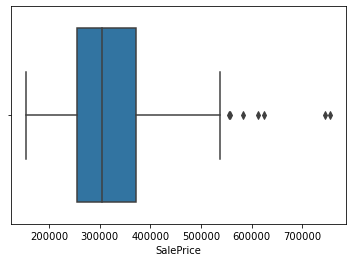

In [79]:
HighAffluent = house_prices_train[(house_prices_train['NeighborhoodCode'] == 3)]
sns.boxplot(x=HighAffluent['SalePrice'])

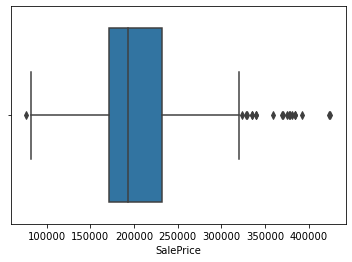

In [80]:
MidAffluent = house_prices_train[(house_prices_train['NeighborhoodCode'] == 2)]
sns.boxplot(x=MidAffluent['SalePrice'])

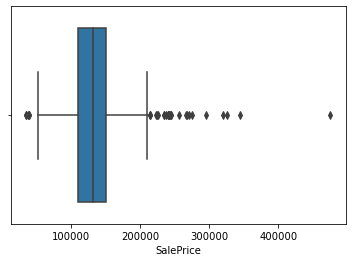

In [81]:
LowAffluent = house_prices_train[(house_prices_train['NeighborhoodCode'] == 1)]
sns.boxplot(x=LowAffluent['SalePrice'])

#### There are still outliers in each neighborhood group

### Note: There are still a lot of outliers, so start with Random Forest which is less sensitive to outliers. Use Random Forest to identify important features and conduct follow-up data analytics (e.g., multiple regression) to better understand the way in which those features can inform remodel recommendations, employing data transformations at that time if needed.

In [119]:
final_train = house_prices_train.drop(columns = ['Alley','PoolQC','Fence','MiscFeature','LotFrontage','Utilities','MSSubClass','MeanNeighborhood'])

In [87]:
final_train.to_csv('final_data.csv',index=False)

In [120]:
final_train.shape

(1451, 78)

In [89]:
final_train[(final_train['NeighborhoodCode'] == 1)].shape

(725, 78)

In [90]:
final_train[(final_train['NeighborhoodCode'] == 2)].shape

(584, 78)

In [91]:
final_train[(final_train['NeighborhoodCode'] == 3)].shape

(142, 78)

## Code categorical variables
### Prepare data for gradient boosting (GBM) in R -- I learned that variables need to be ordinal or label encoded for GBM in R but not for Random Forest in R

In [394]:
encoded = final_train.copy()

In [395]:
encoded.dtypes

Id                    int64
MSZoning             object
LotArea               int64
Street               object
LotShape             object
LandContour          object
LotConfig            object
LandSlope            object
Neighborhood         object
Condition1           object
Condition2           object
BldgType             object
HouseStyle           object
OverallQual           int64
OverallCond           int64
YearBuilt             int64
YearRemodAdd          int64
RoofStyle            object
RoofMatl             object
Exterior1st          object
Exterior2nd          object
MasVnrType           object
MasVnrArea          float64
ExterQual            object
ExterCond            object
Foundation           object
BsmtQual             object
BsmtCond             object
BsmtExposure         object
BsmtFinType1         object
BsmtFinSF1            int64
BsmtFinType2         object
BsmtFinSF2            int64
BsmtUnfSF             int64
TotalBsmtSF           int64
Heating             

In [396]:
for column in encoded.select_dtypes(include=['object']):
    encoded[column], _ = pd.factorize(encoded[column])

In [397]:
final_train.head()

Id MSZoning  LotArea Street LotShape LandContour LotConfig LandSlope  \
0   1       RL     8450   Pave      Reg         Lvl    Inside       Gtl   
1   2       RL     9600   Pave      Reg         Lvl       FR2       Gtl   
2   3       RL    11250   Pave      IR1         Lvl    Inside       Gtl   
3   4       RL     9550   Pave      IR1         Lvl    Corner       Gtl   
4   5       RL    14260   Pave      IR1         Lvl       FR2       Gtl   

  Neighborhood Condition1 Condition2 BldgType HouseStyle  OverallQual  \
0      CollgCr       Norm       Norm     1Fam     2Story            7   
1      Veenker      Feedr       Norm     1Fam     1Story            6   
2      CollgCr       Norm       Norm     1Fam     2Story            7   
3      Crawfor       Norm       Norm     1Fam     2Story            7   
4      NoRidge       Norm       Norm     1Fam     2Story            8   

   OverallCond  YearBuilt  YearRemodAdd RoofStyle RoofMatl Exterior1st  \
0            5       2003          2003     Gable  CompShg     VinylSd   
1            8       1976          1976     Gable  CompShg     MetalSd   
2            5       2001          2002     Gable  CompShg     VinylSd   
3            5       1915          1970     Gable  CompShg     Wd Sdng   
4            5       2000          2000     Gable  CompShg     VinylSd   

  Exterior2nd MasVnrType  MasVnrArea ExterQual ExterCond Foundation BsmtQual  \
0     VinylSd    BrkFace       196.0        Gd        TA      PConc       Gd   
1     MetalSd       None         0.0        TA        TA     CBlock       Gd   
2     VinylSd    BrkFace       162.0        Gd        TA      PConc       Gd   
3     Wd Shng       None         0.0        TA        TA     BrkTil       TA   
4     VinylSd    BrkFace       350.0        Gd        TA      PConc       Gd   

  BsmtCond BsmtExposure BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  \
0       TA           No          GLQ         706          Unf           0   
1       TA           Gd          ALQ         978          Unf           0   
2       TA           Mn          GLQ         486          Unf           0   
3       Gd           No          ALQ         216          Unf           0   
4       TA           Av          GLQ         655          Unf           0   

   BsmtUnfSF  TotalBsmtSF Heating HeatingQC CentralAir Electrical  1stFlrSF  \
0        150          856    GasA        Ex          Y      SBrkr       856   
1        284         1262    GasA        Ex          Y      SBrkr      1262   
2        434          920    GasA        Ex          Y      SBrkr       920   
3        540          756    GasA        Gd          Y      SBrkr       961   
4        490         1145    GasA        Ex          Y      SBrkr      1145   

   2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  \
0       854             0       1710             1             0         2   
1         0             0       1262             0             1         2   
2       866             0       1786             1             0         2   
3       756             0       1717             1             0         1   
4      1053             0       2198             1             0         2   

   HalfBath  BedroomAbvGr  KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  \
0         1             3             1          Gd             8        Typ   
1         0             3             1          TA             6        Typ   
2         1             3             1          Gd             6        Typ   
3         0             3             1          Gd             7        Typ   
4         1             4             1          Gd             9        Typ   

   Fireplaces FireplaceQu GarageType GarageYrBlt GarageFinish  GarageCars  \
0           0          NF     Attchd        2003          RFn           2   
1           1          TA     Attchd        1976          RFn           2   
2           1          TA     Attchd        2001          RFn       

In [398]:
encoded.head(100)

Id  MSZoning  LotArea  Street  LotShape  LandContour  LotConfig  \
0     1         0     8450       0         0            0          0   
1     2         0     9600       0         0            0          1   
2     3         0    11250       0         1            0          0   
3     4         0     9550       0         1            0          2   
4     5         0    14260       0         1            0          1   
5     6         0    14115       0         1            0          0   
6     7         0    10084       0         0            0          0   
7     8         0    10382       0         1            0          2   
8     9         1     6120       0         0            0          0   
9    10         0     7420       0         0            0          2   
10   11         0    11200       0         0            0          0   
11   12         0    11924       0         1            0          0   
12   13         0    12968       0         2            0          0   
13   14         0    10652       0         1            0          0   
14   15         0    10920       0         1            0          2   
15   16         1     6120       0         0            0          2   
16   17         0    11241       0         1            0          3   
17   18         0    10791       0         0            0          0   
18   19         0    13695       0         0            0          0   
19   20         0     7560       0         0            0          0   
20   21         0    14215       0         1            0          2   
21   22         1     7449       0         0            1          0   
22   23         0     9742       0         0            0          0   
23   24         1     4224       0         0            0          0   
24   25         0     8246       0         1            0          0   
25   26         0    14230       0         0            0          2   
26   27         0     7200       0         0            0          2   
27   28         0    11478       0         0            0          0   
28   29         0    16321       0         1            0          3   
29   30         1     6324       0         1            0          0   
30   31         2     8500       0         0            0          0   
31   32         0     8544       0         1            0          3   
32   33         0    11049       0         0            0          2   
33   34         0    10552       0         1            0          0   
34   35         0     7313       0         0            0          0   
35   36         0    13418       0         0            0          0   
36   37         0    10859       0         0            0          2   
37   38         0     8532       0         0            0          0   
38   39         0     7922       0         0            0          0   
39   40         0     6040       0         0            0          0   
40   41         0     8658       0         0            0          0   
41   42         0    16905       0         0            0          0   
42   43         0     9180       0         1            0          3   
43   44         0     9200       0         1            0          3   
44   45         0     7945       0         0            0          0   
45   46         0     7658       0         0            0          0   
46   47         0    12822       0         1            0          3   
47   48         3    11096       0         0            0          0   
48   49         1     4456       0         0            0          0   
49   50         0     7742       0         0            0          0   
50   51         0    13869       0         2            0          2   
51   52         1     6240       0         0            0          0   
52   53         1     8472       1         2            1          2   
53   54         0    50271       0         1            2          0   
54   55         0     7134       0         0 

In [400]:
encoded_dataT = encoded.copy()

In [401]:
from scipy import stats
encoded_dataT['SalePrice'], _ = stats.boxcox(encoded_dataT['SalePrice'])

In [402]:
encoded_dataT.head()

Id  MSZoning  LotArea  Street  LotShape  LandContour  LotConfig  LandSlope  \
0   1         0     8450       0         0            0          0          0   
1   2         0     9600       0         0            0          1          0   
2   3         0    11250       0         1            0          0          0   
3   4         0     9550       0         1            0          2          0   
4   5         0    14260       0         1            0          1          0   

   Neighborhood  Condition1  Condition2  BldgType  HouseStyle  OverallQual  \
0             0           0           0         0           0            7   
1             1           1           0         0           1            6   
2             0           0           0         0           0            7   
3             2           0           0         0           0            7   
4             3           0           0         0           0            8   

   OverallCond  YearBuilt  YearRemodAdd  RoofStyle  RoofMatl  Exterior1st  \
0            5       2003          2003          0         0            0   
1            8       1976          1976          0         0            1   
2            5       2001          2002          0         0            0   
3            5       1915          1970          0         0            2   
4            5       2000          2000          0         0            0   

   Exterior2nd  MasVnrType  MasVnrArea  ExterQual  ExterCond  Foundation  \
0            0           0       196.0          0          0           0   
1            1           1         0.0          1          0           1   
2            0           0       162.0          0          0           0   
3            2           1         0.0          1          0           2   
4            0           0       350.0          0          0           0   

   BsmtQual  BsmtCond  BsmtExposure  BsmtFinType1  BsmtFinSF1  BsmtFinType2  \
0         0         0             0             0         706             0   
1         0         0             1             1         978             0   
2         0         0             2             0         486             0   
3         1         1             0             1         216             0   
4         0         0             3             0         655             0   

   BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  Heating  HeatingQC  CentralAir  \
0           0        150          856        0          0           0   
1           0        284         1262        0          0           0   
2           0        434          920        0          0           0   
3           0        540          756        0          1           0   
4           0        490         1145        0          0           0   

   Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  \
0           0       856       854             0       1710             1   
1           0      1262         0             0       1262             0   
2           0       920       866             0       1786             1   
3           0       961       756             0       1717             1   
4           0      1145      1053             0       2198             1   

   BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  KitchenQual  \
0             0         2         1             3             1            0   
1             1         2         0             3             1            1   
2             0         2         1             3             1            0   
3             0         1         0             3             1            0   
4             0         2         1             4             1            0   

   TotRmsAbvGrd  Functional  Fireplaces  FireplaceQu  GarageType  GarageYrBlt  \
0             8           0           0            0           0            0   
1             6           0           1            1           0            1   
2             6           0     

In [403]:
encoded_dataT.to_csv('encoded_dataT.csv',index=False)

## Prepare data for multiple regression in R - focusing on variables identified in the Random Forest and Gradient Boosting models for purposes of developing interaction terms

### Need to examine outliers via scatter plote and conduct Box Cox transformation of feature variables when needed
### Need to ordinal encode and binary encode categorical variables when possible for ordered or binary variables

In [276]:
MLR_data = final_train[['GrLivArea','OverallQual','TotalBsmtSF','1stFlrSF','2ndFlrSF','GarageCars','Fireplaces','LotArea','YearBuilt','GarageType','ExterQual','KitchenQual','YearRemodAdd','BsmtFinType1','HalfBath','MSZoning','FullBath','BsmtQual','CentralAir','BsmtUnfSF','OpenPorchSF','GarageFinish','Exterior1st','GarageArea','OverallCond','BldgType','NeighborhoodCode','SalePrice','MasVnrArea', 'SaleCondition']]


In [134]:
MLR_data['SalePrice'].value_counts()

140000    20
135000    17
155000    14
145000    14
190000    13
110000    13
115000    12
160000    12
139000    11
130000    11
185000    10
125000    10
180000    10
143000    10
144000    10
147000     9
127000     9
100000     9
175000     9
230000     8
165000     8
250000     8
176000     8
141000     8
129000     8
215000     8
170000     8
200000     8
119000     7
112000     7
173000     7
235000     7
174000     7
148000     7
128000     7
120000     7
178000     7
181000     7
108000     6
132500     6
113000     6
127500     6
189000     6
118000     6
225000     6
187500     6
239000     6
205000     6
157000     6
158000     6
137500     6
152000     6
124000     6
240000     6
132000     6
133000     6
260000     6
136500     5
172500     5
179900     5
220000     5
154000     5
105000     5
137000     5
210000     5
192000     5
275000     5
171000     5
214000     5
290000     5
177000     5
207500     5
151000     5
122000     4
125500     4
129900     4
149000     4

In [201]:
MLR_data.head()

GrLivArea  OverallQual  TotalBsmtSF  1stFlrSF  2ndFlrSF  GarageCars  \
0       1710            7          856       856       854           2   
1       1262            6         1262      1262         0           2   
2       1786            7          920       920       866           2   
3       1717            7          756       961       756           3   
4       2198            8         1145      1145      1053           3   

   Fireplaces  LotArea  YearBuilt GarageType ExterQual KitchenQual  \
0           0     8450       2003     Attchd        Gd          Gd   
1           1     9600       1976     Attchd        TA          TA   
2           1    11250       2001     Attchd        Gd          Gd   
3           1     9550       1915     Detchd        TA          Gd   
4           1    14260       2000     Attchd        Gd          Gd   

   YearRemodAdd BsmtFinType1  HalfBath MSZoning  FullBath BsmtQual CentralAir  \
0          2003          GLQ         1       RL         2       Gd          Y   
1          1976          ALQ         0       RL         2       Gd          Y   
2          2002          GLQ         1       RL         2       Gd          Y   
3          1970          ALQ         0       RL         1       TA          Y   
4          2000          GLQ         1       RL         2       Gd          Y   

   BsmtUnfSF  OpenPorchSF GarageFinish Exterior1st  GarageArea  OverallCond  \
0        150           61          RFn     VinylSd         548            5   
1        284            0          RFn     MetalSd         460            8   
2        434           42          RFn     VinylSd         608            5   
3        540           35          Unf     Wd Sdng         642            5   
4        490           84          RFn     VinylSd         836            5   

  BldgType  NeighborhoodCode  SalePrice  MasVnrArea  
0     1Fam                 2     208500       196.0  
1     1Fam                 2     181500         0.0  
2     1Fam                 2     223500       162.0  
3     1Fam                 2     140000         0.0  
4     1Fam                 3     250000       350.0

In [202]:
from scipy import stats

In [277]:
MLR_data = MLR_data.copy()

In [278]:
MLR_data['SalePriceT'], _ = stats.boxcox(MLR_data['SalePrice'])

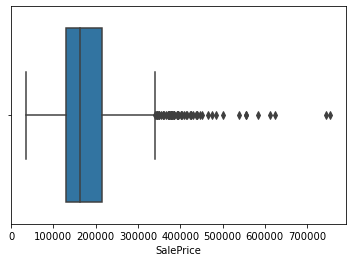

In [280]:
sns.boxplot(x=MLR_data['SalePrice'])

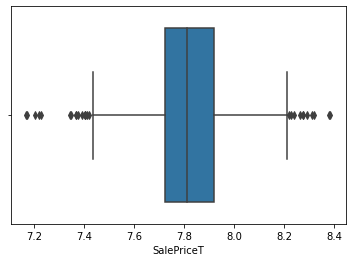

In [281]:
sns.boxplot(x=MLR_data['SalePriceT'])

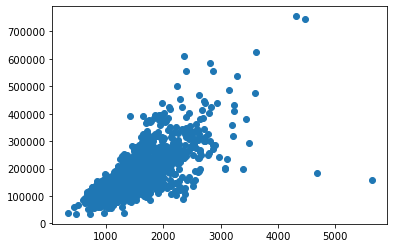

In [286]:
plt.scatter(MLR_data['GrLivArea'],MLR_data['SalePrice'])

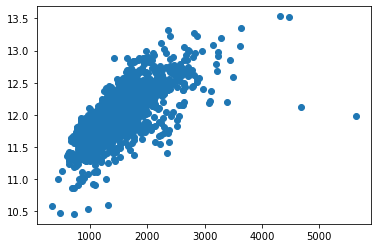

In [287]:
plt.scatter(MLR_data['GrLivArea'],MLR_data['SalePriceLog'])

In [288]:
MLR_data['GrLivAreaLog'] = MLR_data['GrLivArea'].apply(lambda x: math.log(x))

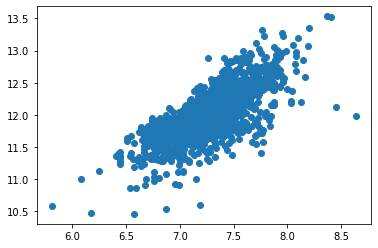

In [289]:
plt.scatter(MLR_data['GrLivAreaLog'],MLR_data['SalePriceLog'])

In [290]:
MLR_data['GrLivAreaT'], _ = stats.boxcox(MLR_data['GrLivArea'])

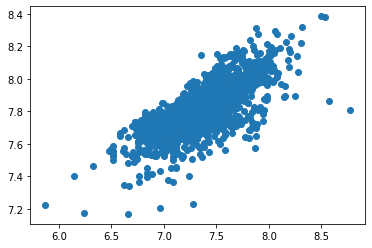

In [291]:
plt.scatter(MLR_data['GrLivAreaT'],MLR_data['SalePriceT'])

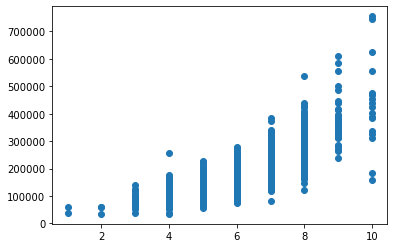

In [292]:
plt.scatter(MLR_data['OverallQual'],MLR_data['SalePrice'])

In [293]:
MLR_data['OverallQualT'], _ = stats.boxcox(MLR_data['OverallQual'])

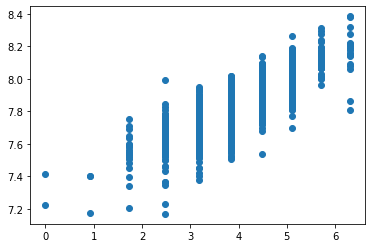

In [294]:
plt.scatter(MLR_data['OverallQualT'],MLR_data['SalePriceT'])

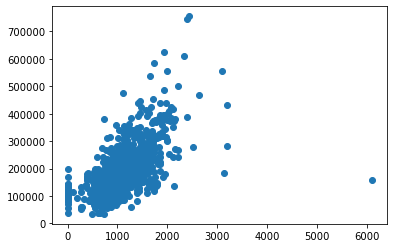

In [295]:
plt.scatter(MLR_data['TotalBsmtSF'],MLR_data['SalePrice'])

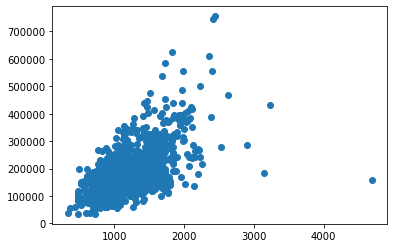

In [296]:
plt.scatter(MLR_data['1stFlrSF'],MLR_data['SalePrice'])

In [297]:
MLR_data['1stFlrSFT'], _ = stats.boxcox(MLR_data['1stFlrSF'])

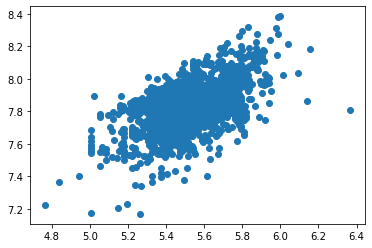

In [298]:
plt.scatter(MLR_data['1stFlrSFT'],MLR_data['SalePriceT'])

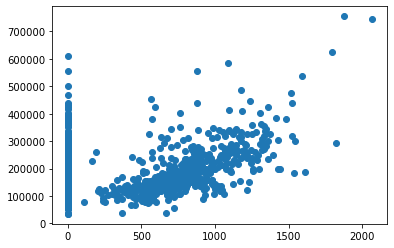

In [299]:
plt.scatter(MLR_data['2ndFlrSF'],MLR_data['SalePrice'])

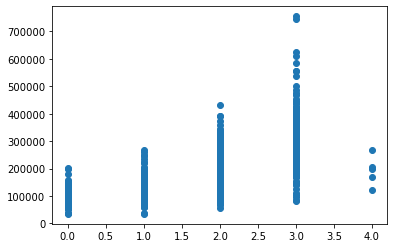

In [300]:
plt.scatter(MLR_data['GarageCars'],MLR_data['SalePrice'])

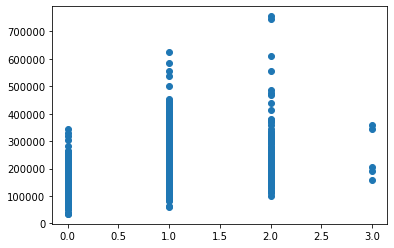

In [301]:
plt.scatter(MLR_data['Fireplaces'],MLR_data['SalePrice'])

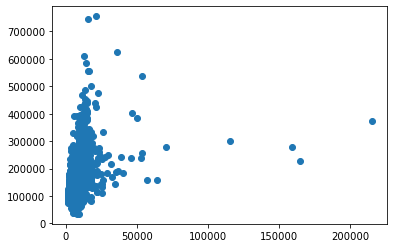

In [302]:
plt.scatter(MLR_data['LotArea'],MLR_data['SalePrice'])

In [303]:
MLR_data['LotAreaT'], _ = stats.boxcox(MLR_data['LotArea'])

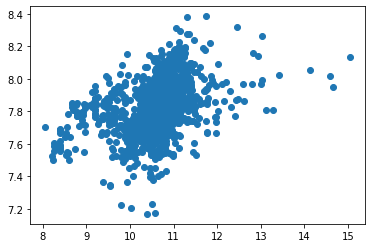

In [304]:
plt.scatter(MLR_data['LotAreaT'],MLR_data['SalePriceT'])

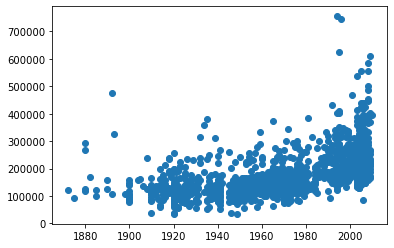

In [305]:
plt.scatter(MLR_data['YearBuilt'],MLR_data['SalePrice'])

In [306]:
MLR_data['YearBuiltT'], _ = stats.boxcox(MLR_data['YearBuilt'])

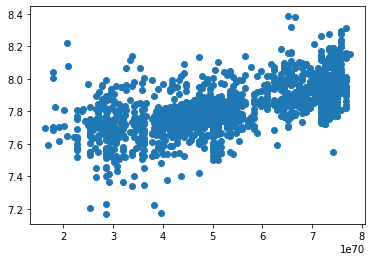

In [307]:
plt.scatter(MLR_data['YearBuiltT'],MLR_data['SalePriceT'])

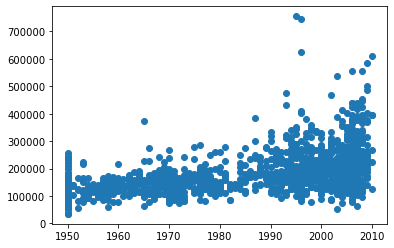

In [308]:
plt.scatter(MLR_data['YearRemodAdd'],MLR_data['SalePrice'])

In [309]:
MLR_data['YearRemodAddT'], _ = stats.boxcox(MLR_data['YearRemodAdd'])

/Users/sjk252/opt/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:195: RuntimeWarning: overflow encountered in multiply
  x = um.multiply(x, x, out=x)
/Users/sjk252/opt/anaconda3/lib/python3.7/site-packages/scipy/optimize/optimize.py:2116: RuntimeWarning: invalid value encountered in double_scalars
  tmp2 = (x - v) * (fx - fw)


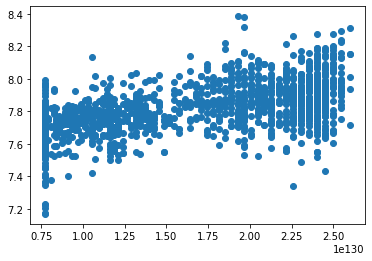

In [310]:
plt.scatter(MLR_data['YearRemodAddT'],MLR_data['SalePriceT'])

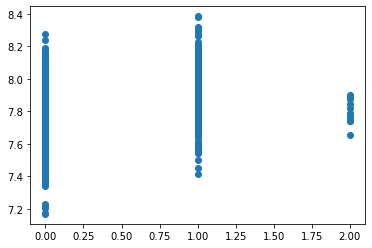

In [311]:
plt.scatter(MLR_data['HalfBath'],MLR_data['SalePriceT'])

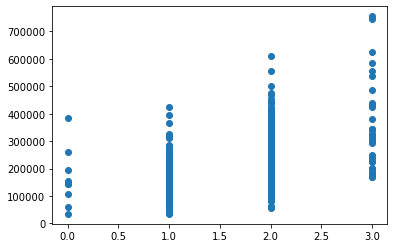

In [312]:
plt.scatter(MLR_data['FullBath'],MLR_data['SalePrice'])

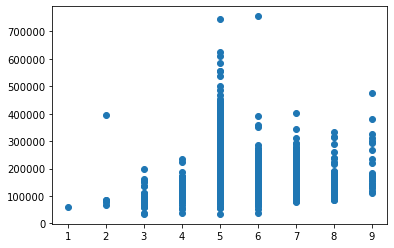

In [313]:
plt.scatter(MLR_data['OverallCond'],MLR_data['SalePrice'])

In [314]:
MLR_data['OverallCondT'], _ = stats.boxcox(MLR_data['OverallCond'])

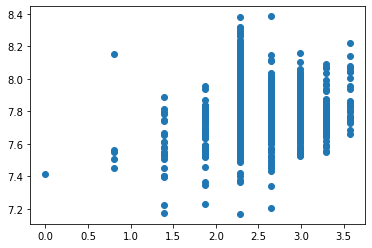

In [315]:
plt.scatter(MLR_data['OverallCondT'],MLR_data['SalePriceT'])

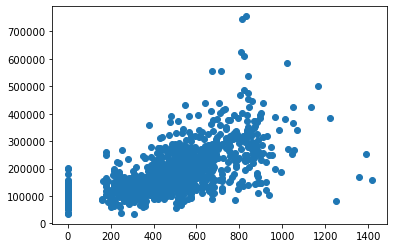

In [316]:
plt.scatter(MLR_data['GarageArea'],MLR_data['SalePrice'])

In [317]:
MLR_data['TotalBsmtSFT'],_ = stats.boxcox(MLR_data['TotalBsmtSF'].apply(lambda x: x + 1))

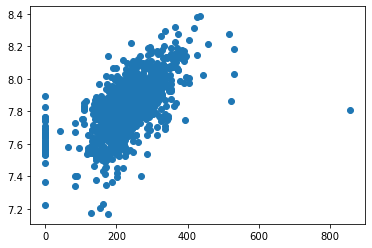

In [318]:
plt.scatter(MLR_data['TotalBsmtSFT'],MLR_data['SalePriceT'])

In [319]:
MLR_data['2ndFlrSFT'],_ = stats.boxcox(MLR_data['2ndFlrSF'].apply(lambda x: x + 1))

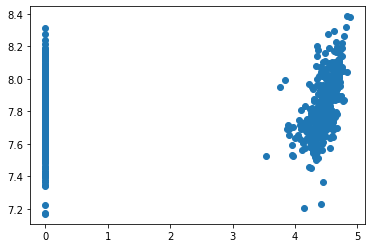

In [320]:
plt.scatter(MLR_data['2ndFlrSFT'],MLR_data['SalePriceT'])

In [321]:
MLR_data['BsmtUnfSFT'],_ = stats.boxcox(MLR_data['BsmtUnfSF'].apply(lambda x: x + 1))

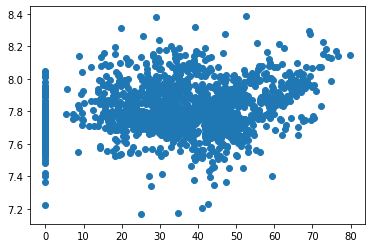

In [322]:
plt.scatter(MLR_data['BsmtUnfSFT'],MLR_data['SalePriceT'])

In [323]:
MLR_data['OpenPorchSFT'],_ = stats.boxcox(MLR_data['OpenPorchSF'].apply(lambda x: x + 1))

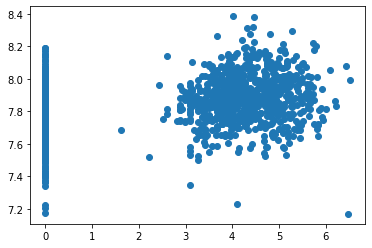

In [324]:
plt.scatter(MLR_data['OpenPorchSFT'],MLR_data['SalePriceT'])

In [325]:
MLR_data['GarageAreaT'],_ = stats.boxcox(MLR_data['GarageArea'].apply(lambda x: x + 1))

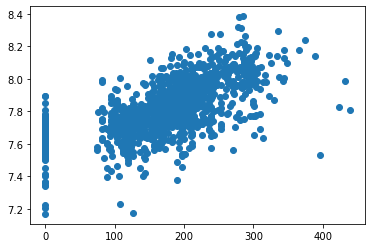

In [326]:
plt.scatter(MLR_data['GarageAreaT'],MLR_data['SalePriceT'])

In [327]:
MLR_data['BsmtCode'] = [1 if x > 0 else 0 for x in MLR_data['TotalBsmtSF']] 

In [354]:
MLR_data['FinBsmtCode'] = [0 if x == 'Unf' or x == 'NB' else 1 for x in MLR_data['BsmtFinType1']] 

In [357]:
MLR_data['UnFinBsmtCode'] = [1 if x == 'Unf' else 0 for x in MLR_data['BsmtFinType1']] 

In [328]:
MLR_data['2ndFlrCode'] = [1 if x > 0 else 0 for x in MLR_data['2ndFlrSF']] 

In [329]:
MLR_data['PorchCode'] = [1 if x > 0 else 0 for x in final_train['TotalPorchSF']]

In [330]:
MLR_data['GarageCode'] = [1 if x > 0 else 0 for x in MLR_data['GarageArea']] 

In [331]:
MLR_data['SaleConditionCode'] = [1 if x == 'Normal' else 0 for x in MLR_data['SaleCondition']] 

In [353]:
MLR_data.head(100)

GrLivArea  OverallQual  TotalBsmtSF  1stFlrSF  2ndFlrSF  GarageCars  \
0        1710            7          856       856       854           2   
1        1262            6         1262      1262         0           2   
2        1786            7          920       920       866           2   
3        1717            7          756       961       756           3   
4        2198            8         1145      1145      1053           3   
5        1362            5          796       796       566           2   
6        1694            8         1686      1694         0           2   
7        2090            7         1107      1107       983           2   
8        1774            7          952      1022       752           2   
9        1077            5          991      1077         0           1   
10       1040            5         1040      1040         0           1   
11       2324            9         1175      1182      1142           3   
12        912            5          912       912         0           1   
13       1494            7         1494      1494         0           3   
14       1253            6         1253      1253         0           1   
15        854            7          832       854         0           2   
16       1004            6         1004      1004         0           2   
17       1296            4            0      1296         0           2   
18       1114            5         1114      1114         0           2   
19       1339            5         1029      1339         0           1   
20       2376            8         1158      1158      1218           3   
21       1108            7          637      1108         0           1   
22       1795            8         1777      1795         0           2   
23       1060            5         1040      1060         0           2   
24       1060            5         1060      1060         0           1   
25       1600            8         1566      1600         0           3   
26        900            5          900       900         0           2   
27       1704            8         1704      1704         0           3   
28       1600            5         1484      1600         0           1   
29        520            4          520       520         0           1   
30       1317            4          649       649       668           1   
31       1228            5         1228      1228         0           1   
32       1234            8         1234      1234         0           2   
33       1700            5         1398      1700         0           2   
34       1561            9         1561      1561         0           2   
35       2452            8         1117      1132      1320           3   
36       1097            5         1097      1097         0           2   
37       1297            5         1297      1297         0           2   
38       1057            5         1057      1057         0           1   
39       1152            4            0      1152         0           0   
40       1324            6         1088      1324         0           2   
41       1328            5         1350      1328         0           1   
42        884            5          840       884         0           2   
43        938            5          938       938         0           1   
44       1150            5         1150      1150         0           1   
45       1752            9         1752      1752         0           2   
46       2149            7         1434      1518       631           2   
47       1656            8         1656      1656         0           3   
48       1452            4          736       736       716           0   
49        955            5          955       955         0           1   
50       1470            6          794       794       676           2   
51       1176            6          816       816         0           2   
52        816            5   

In [333]:
MLR_data['HalfBathCode'] = [0.5 if x > 0 else 0 for x in MLR_data['HalfBath']] 

In [334]:
MLR_data['BathTot'] = MLR_data['HalfBathCode'] + MLR_data['FullBath']

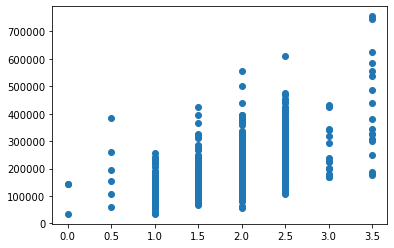

In [335]:
plt.scatter(MLR_data['BathTot'],MLR_data['SalePrice'])

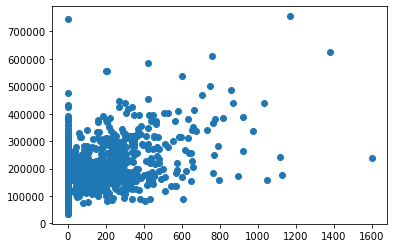

In [336]:
plt.scatter(MLR_data['MasVnrArea'],MLR_data['SalePrice'])

In [347]:
MLR_data['MasVnrArea'].value_counts()

0.0       860
72.0        8
180.0       8
108.0       8
120.0       7
16.0        7
80.0        6
200.0       6
106.0       6
340.0       6
170.0       5
132.0       5
360.0       5
84.0        5
320.0       5
100.0       4
196.0       4
246.0       4
216.0       4
160.0       4
183.0       4
178.0       4
270.0       4
300.0       4
210.0       4
268.0       4
252.0       4
168.0       4
336.0       4
220.0       4
76.0        4
288.0       4
456.0       4
40.0        4
50.0        3
130.0       3
82.0        3
208.0       3
90.0        3
70.0        3
44.0        3
420.0       3
99.0        3
110.0       3
104.0       3
85.0        3
272.0       3
226.0       3
174.0       3
240.0       3
186.0       3
169.0       3
148.0       3
350.0       3
128.0       3
176.0       3
166.0       3
116.0       3
136.0       3
312.0       3
256.0       3
145.0       3
74.0        3
42.0        3
98.0        2
66.0        2
660.0       2
243.0       2
338.0       2
143.0       2
318.0       2
285.0 

In [348]:
MLR_data['MSVnrCode'] = [1 if x > 0 else 0 for x in MLR_data['MasVnrArea']] 

In [337]:
MLR_data['HeatingQC'] = final_train['HeatingQC']

In [338]:
MLR_data['PavedDrive'] = final_train['PavedDrive']

In [339]:
MLR_data['MSZoningCode'] = [1 if x =='RL' else 0 for x in MLR_data['MSZoning']] 

In [340]:
MLR_data['ExterQualCode'] = [5 if x == 'Ex' else 4 if x == 'Gd' else 3 if x == 'TA' else 2 if x == 'Fa' else 1 if x == 'Po' else 0 for x in MLR_data['ExterQual']] 

In [341]:
MLR_data['HeatingQCCode'] = [5 if x == 'Ex' else 4 if x == 'Gd' else 3 if x == 'TA' else 2 if x == 'Fa' else 1 if x == 'Po' else 0 for x in MLR_data['HeatingQC']] 


In [342]:
MLR_data['CentralAirCode'] = [1 if x == 'Y' else 0 for x in MLR_data['CentralAir']] 


In [343]:
MLR_data['KitchenQualCode'] = [5 if x == 'Ex' else 4 if x == 'Gd' else 3 if x == 'TA' else 2 if x == 'Fa' else 1 if x == 'Po' else 0 for x in MLR_data['KitchenQual']] 


In [344]:
MLR_data['PavedDriveCode'] = [3 if x == 'Y' else 2 if x == 'P' else 1 if x == 'N' else 0 for x in MLR_data['PavedDrive']] 


In [345]:
MLR_data['BldgTypeCode'] = [1 if x == '1Fam' else 0 for x in MLR_data['BldgType']] 

In [359]:
MLR_data.columns

Index(['GrLivArea', 'OverallQual', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'GarageCars', 'Fireplaces', 'LotArea', 'YearBuilt', 'GarageType',
       'ExterQual', 'KitchenQual', 'YearRemodAdd', 'BsmtFinType1', 'HalfBath',
       'MSZoning', 'FullBath', 'BsmtQual', 'CentralAir', 'BsmtUnfSF',
       'OpenPorchSF', 'GarageFinish', 'Exterior1st', 'GarageArea',
       'OverallCond', 'BldgType', 'NeighborhoodCode', 'SalePrice',
       'MasVnrArea', 'SaleCondition', 'SalePriceT', 'SalePriceSqrt',
       'SalePriceLog', 'GrLivAreaLog', 'GrLivAreaT', 'OverallQualT',
       '1stFlrSFT', 'LotAreaT', 'YearBuiltT', 'YearRemodAddT', 'OverallCondT',
       'TotalBsmtSFT', '2ndFlrSFT', 'BsmtUnfSFT', 'OpenPorchSFT',
       'GarageAreaT', 'BsmtCode', '2ndFlrCode', 'PorchCode', 'GarageCode',
       'SaleConditionCode', 'HalfBathCode', 'BathTot', 'HeatingQC',
       'PavedDrive', 'MSZoningCode', 'ExterQualCode', 'HeatingQCCode',
       'CentralAirCode', 'KitchenQualCode', 'PavedDriveCode', 'BldgTypeCo

In [360]:
MLR_data_final = MLR_data[['GrLivAreaT','OverallQualT','FinBsmtCode','UnFinBsmtCode','GarageCode','1stFlrSFT','2ndFlrCode','GarageCars','Fireplaces','LotAreaT','YearBuiltT','ExterQualCode','KitchenQualCode','YearRemodAddT','BathTot','MSZoningCode','CentralAirCode','PorchCode','HeatingQCCode','PavedDriveCode','OverallCondT','SaleConditionCode','MSVnrCode','BldgTypeCode','NeighborhoodCode','SalePriceT']]


In [351]:
MLR_data_final.head()

GrLivAreaT  OverallQualT  BsmtCode  GarageCode  1stFlrSFT  2ndFlrCode  \
0    7.542325      4.486346         1           1   5.369675           1   
1    7.230656      3.841731         1           1   5.607286           0   
2    7.586965      4.486346         1           1   5.414305           1   
3    7.546519      4.486346         1           1   5.441182           1   
4    7.800138      5.109622         1           1   5.548342           1   

   GarageCars  Fireplaces   LotAreaT    YearBuiltT  ExterQualCode  \
0           2           0  10.484299  7.190291e+70              4   
1           2           1  10.655010  5.343976e+70              3   
2           2           1  10.868179  7.034924e+70              4   
3           3           1  10.648010  2.692041e+70              3   
4           3           1  11.188858  6.958447e+70              4   

   KitchenQualCode  YearRemodAddT  BathTot  MSZoningCode  CentralAirCode  \
0                4  2.261140e+130      2.5             1               1   
1                3  1.314515e+130      2.0             1               1   
2                4  2.216459e+130      2.5             1               1   
3                4  1.164077e+130      1.0             1               1   
4                4  2.129665e+130      2.5             1               1   

   PorchCode  HeatingQCCode  PavedDriveCode  OverallCondT  SaleConditionCode  \
0          1              5               3      2.282670                  1   
1          0              5               3      3.288445                  1   
2          1              5               3      2.282670                  1   
3          1              4               3      2.282670                  0   
4          1              5               3      2.282670                  1   

   MSVnrCode  BldgTypeCode  NeighborhoodCode  SalePriceT  
0          1             1                 2    7.910830  
1          0             1                 2    7.856833  
2          1             1                 2    7.937661  
3          0             1                 2    7.754180  
4          1             1                 3    7.980634

In [361]:
MLR_data_final.to_csv('MLR_data.csv',index=False)

In [384]:
MLR_data_int = MLR_data_final.copy()

In [385]:
MLR_data_int['NeighbKitchenInt'] = MLR_data_int.apply(lambda row: row.NeighborhoodCode * row.KitchenQualCode, axis=1)


In [386]:
MLR_data_int['NeighbBathInt'] = MLR_data_int.apply(lambda row: row.NeighborhoodCode * row.BathTot, axis=1)


In [387]:
MLR_data_int['Neighb1stFlrSFInt'] = MLR_data_int.apply(lambda row: row.NeighborhoodCode * row["1stFlrSFT"], axis=1)

In [388]:
MLR_data_int['NeighbMSVnrInt'] = MLR_data_int.apply(lambda row: row.NeighborhoodCode * row.MSVnrCode, axis=1)

In [391]:
MLR_data_int['NeighbExtQuInt'] = MLR_data_int.apply(lambda row: row.NeighborhoodCode * row.ExterQualCode, axis=1)

In [392]:
MLR_data_int['NeighbPorchInt'] = MLR_data_int.apply(lambda row: row.NeighborhoodCode * row.PorchCode, axis=1)

In [366]:
MLR_data_int.head()

GrLivAreaT  OverallQualT  FinBsmtCode  UnFinBsmtCode  GarageCode  \
0    7.542325      4.486346            1              0           1   
1    7.230656      3.841731            1              0           1   
2    7.586965      4.486346            1              0           1   
3    7.546519      4.486346            1              0           1   
4    7.800138      5.109622            1              0           1   

   1stFlrSFT  2ndFlrCode  GarageCars  Fireplaces   LotAreaT    YearBuiltT  \
0   5.369675           1           2           0  10.484299  7.190291e+70   
1   5.607286           0           2           1  10.655010  5.343976e+70   
2   5.414305           1           2           1  10.868179  7.034924e+70   
3   5.441182           1           3           1  10.648010  2.692041e+70   
4   5.548342           1           3           1  11.188858  6.958447e+70   

   ExterQualCode  KitchenQualCode  YearRemodAddT  BathTot  MSZoningCode  \
0              4                4  2.261140e+130      2.5             1   
1              3                3  1.314515e+130      2.0             1   
2              4                4  2.216459e+130      2.5             1   
3              3                4  1.164077e+130      1.0             1   
4              4                4  2.129665e+130      2.5             1   

   CentralAirCode  PorchCode  HeatingQCCode  PavedDriveCode  OverallCondT  \
0               1          1              5               3      2.282670   
1               1          0              5               3      3.288445   
2               1          1              5               3      2.282670   
3               1          1              4               3      2.282670   
4               1          1              5               3      2.282670   

   SaleConditionCode  MSVnrCode  BldgTypeCode  NeighborhoodCode  SalePriceT  \
0                  1          1             1                 2    7.910830   
1                  1          0             1                 2    7.856833   
2                  1          1             1                 2    7.937661   
3                  0          0             1                 2    7.754180   
4                  1          1             1                 3    7.980634   

   NeighbKitchenInt  NeighbBathInt  
0               8.0            5.0  
1               6.0            4.0  
2               8.0            5.0  
3               8.0            2.0  
4              12.0            7.5

In [393]:
MLR_data_int.to_csv('MLR_data_int_full.csv',index=False)

In [459]:
ridge_coefs = pd.read_csv('ridge_coefs.csv')

In [462]:
ridge_coefs.columns = ["Features","coefs", "redund"]

In [464]:
ridge_coefs = ridge_coefs.drop(columns = "redund")

In [507]:
ridge_coefs_top = ridge_coefs.loc[0:24,:]

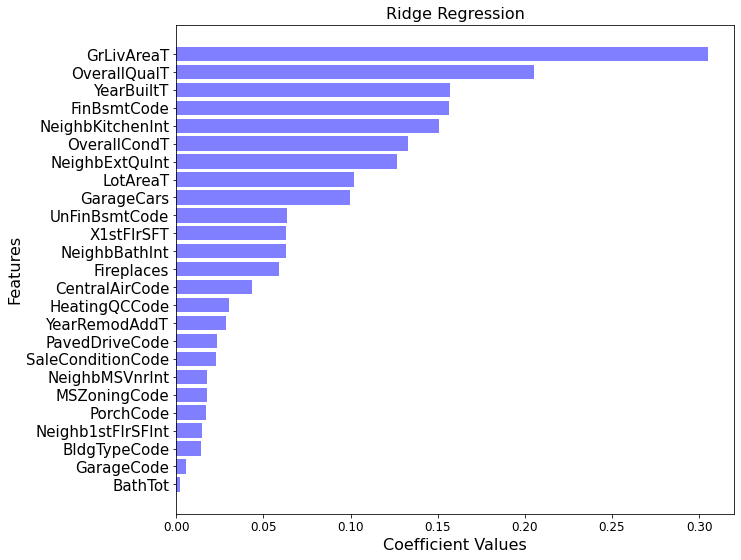

In [511]:
plt.figure(figsize=(10,9))

plt.barh(ridge_coefs_top.Features, ridge_coefs_top.coefs, align='center', alpha=0.5, color = 'blue')
plt.xticks(fontsize=12)
plt.yticks(fontsize=15)
plt.xlabel('Coefficient Values', fontsize=16)
plt.ylabel('Features', fontsize=16)
plt.title('Ridge Regression', fontsize=16)
plt.gca().invert_yaxis()

plt.show()